In [1]:
using Scenred2, LightGraphs, TikzGraphs, TikzPictures

In [2]:
T = 5 #number of time steps
S = 19 # number of scenarios
R = 2 # number of random variables

# we create randomly a discrete probability distribution for the S scenarios
probas = rand(S)
probas = round.(probas./sum(probas),4)
probas[end] = 1-sum(probas[1:end-1])

# we create S random scenarios
scenarios = [Scenred2Scenario(p, round.(rand(T,R),3)) for p in probas ]

# We build a fan out of the S scenarios associated with their probability
fan = Scenred2Fan(T,S,R,scenarios)

Scenred2.Scenred2Fan(5, 19, 2, Scenred2.Scenred2Scenario[Scenred2.Scenred2Scenario(0.015, [0.955 0.728; 0.56 0.065; … ; 0.955 0.783; 0.13 0.437]), Scenred2.Scenred2Scenario(0.093, [0.673 0.49; 0.497 0.77; … ; 0.866 0.937; 0.208 0.396]), Scenred2.Scenred2Scenario(0.0477, [0.491 0.745; 0.378 0.306; … ; 0.743 0.683; 0.564 0.085]), Scenred2.Scenred2Scenario(0.072, [0.598 0.099; 0.45 0.905; … ; 0.283 0.265; 0.822 0.909]), Scenred2.Scenred2Scenario(0.0728, [0.008 0.281; 0.239 0.135; … ; 0.649 0.11; 0.813 0.736]), Scenred2.Scenred2Scenario(0.1094, [0.628 0.094; 0.977 0.147; … ; 0.015 0.113; 0.39 0.835]), Scenred2.Scenred2Scenario(0.0018, [0.343 0.4; 0.098 0.337; … ; 0.753 0.67; 0.113 0.167]), Scenred2.Scenred2Scenario(0.0269, [0.366 0.248; 0.156 0.054; … ; 0.15 0.046; 0.686 0.393]), Scenred2.Scenred2Scenario(0.0175, [0.616 0.827; 0.087 0.198; … ; 0.134 0.62; 0.264 0.656]), Scenred2.Scenred2Scenario(0.0844, [0.619 0.426; 0.875 0.649; … ; 0.972 0.884; 0.273 0.063]), Scenred2.Scenred2Scenario(0.

In [3]:
# if the fan is reasonably small we plot and save it using tikzgraphs 
if S<20
    fdg = DiGraph(fan) #we convert the fan into a directed graph of lightgraphs
    ft=TikzGraphs.plot(fdg[1], string.(fdg[3]), edge_labels = fdg[2] ) #we plot the digraph
    TikzPictures.save(PDF("fan"), ft) #we save it as fan.pdf in the active directory
end

In [4]:
prms = Scenred2Prms(red_percentage = 0.5) # we define scenred2 parameters, all default except the reduction percentage

tree = Scenred2Tree(fan, prms) # we build a tree out of the fan calling scenred2 with the parameters


***********************************************
*  SCENARIO TREE CONSTRUCTION / REDUCTION     *
*                                             *
*  S C E N R E D - 2                          *
*                                             *
*  VERSION: 12/12/2008                        *
*                                             *
*  (C) - Humboldt-University Berlin           *
*        Institute of Mathematics             *
*        Written by: Holger Heitsch           *
*                                             *
***********************************************

YOU ARE EXECUTING THE COMMAND LINE VERSION

MAIN: READ COMMAND FILE
    OUTPUT OF TREE
    TREE CONSTRUCTION SELECTED
    READ SCENARIO PARAMETERS
MAIN: READ COMMAND FILE DONE
MAIN: START TREE CONSTRUCTION
    DETECT CONSTRUCTION METHOD
    CONSTRUCTION METHOD BACKWARD
    READ CONSTRUCTION OPTIONS
    ASSIGN SCENARIO DISTANCES
    START BACKWARD TREE CONSTRUCTION
      REDUCTION METHOD: FORWARD
    *** SCENARIO TREE C

Scenred2.Scenred2Tree(13, 2, Scenred2.Scenred2Node[Scenred2.Scenred2Node(1, 1.0, [0.436, 0.525]), Scenred2.Scenred2Node(1, 1.0, [0.464, 0.345]), Scenred2.Scenred2Node(2, 0.2886, [0.172, 0.919]), Scenred2.Scenred2Node(2, 0.7114, [0.749, 0.409]), Scenred2.Scenred2Node(3, 0.2886, [0.866, 0.937]), Scenred2.Scenred2Node(4, 0.4917, [0.671, 0.301]), Scenred2.Scenred2Node(4, 0.2197, [0.92, 0.825]), Scenred2.Scenred2Node(5, 0.2006, [0.208, 0.396]), Scenred2.Scenred2Node(5, 0.088, [0.822, 0.909]), Scenred2.Scenred2Node(6, 0.1094, [0.39, 0.835]), Scenred2.Scenred2Node(6, 0.2413, [0.469, 0.696]), Scenred2.Scenred2Node(6, 0.141, [0.304, 0.66]), Scenred2.Scenred2Node(7, 0.2197, [0.83, 0.566])])

In [5]:
dg = DiGraph(tree)

({13, 12} directed simple Int64 graph, Dict{Any,Any}(Pair{Any,Any}((2, 3), 0.2886),Pair{Any,Any}((7, 13), 0.2197),Pair{Any,Any}((4, 6), 0.4917),Pair{Any,Any}((6, 12), 0.141),Pair{Any,Any}((4, 7), 0.2197),Pair{Any,Any}((5, 9), 0.088),Pair{Any,Any}((5, 8), 0.2006),Pair{Any,Any}((6, 10), 0.1094),Pair{Any,Any}((2, 4), 0.7114),Pair{Any,Any}((1, 2), 1.0)…), Array{Float64,1}[[0.436, 0.525], [0.464, 0.345], [0.172, 0.919], [0.749, 0.409], [0.866, 0.937], [0.671, 0.301], [0.92, 0.825], [0.208, 0.396], [0.822, 0.909], [0.39, 0.835], [0.469, 0.696], [0.304, 0.66], [0.83, 0.566]])

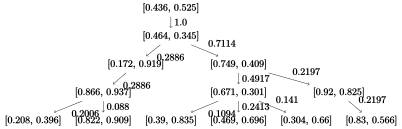

In [6]:
t=TikzGraphs.plot(dg[1], string.(dg[3]), edge_labels = dg[2] )

In [7]:
TikzPictures.save(PDF("tree"), t)